In [13]:
import pandas as pd 
import matplotlib.pyplot as plt
import pysam
import numpy as np
import matplotlib

In [19]:
sam = pysam.AlignmentFile("/SGRNJ06/randd/USER/cjj/celedev/jicuiyaokang/20230417mapping/resultAligned.out.sam")

In [20]:
start,end = [], []

In [21]:
for read in sam:
    start.append(read.reference_start)
    end.append(read.reference_end)

In [22]:
x = ["min", "max", "mean", "median"]
y = [min(start), max(start), np.mean(start), np.median(start)]

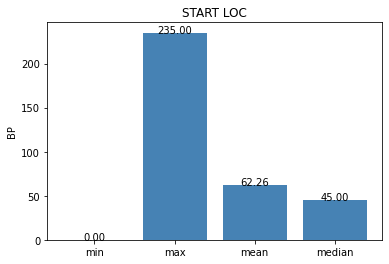

In [23]:
ax = plt.axes()
ax.set_facecolor("white")
ax.grid(False)
plt.bar(x, y, color="steelblue")

for a,b,i in zip(x,y,range(len(x))):
    plt.text(a,b,"%.2f"%y[i], ha="center",fontsize=10)

plt.ylabel("BP")
plt.title("START LOC")
plt.savefig("/SGRNJ06/randd/USER/cjj/celedev/jicuiyaokang/20230417mapping/start_loc.png", dpi=300, bbox_inches="tight")

In [24]:
x = ["min", "max", "mean", "median"]
y = [min(end), max(end), np.mean(end), np.median(end)]

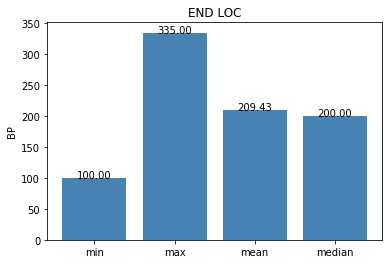

In [25]:
ax = plt.axes()
ax.set_facecolor("white")
ax.grid(False)
plt.bar(x, y, color="steelblue")

for a,b,i in zip(x,y,range(len(x))):
    plt.text(a,b,"%.2f"%y[i], ha="center",fontsize=10)

plt.ylabel("BP")
plt.title("END LOC")
plt.savefig("/SGRNJ06/randd/USER/cjj/celedev/jicuiyaokang/20230417mapping/end_loc.png", dpi=300, bbox_inches="tight")

In [26]:
len(end)

2593363

In [18]:
import math
import sys
from collections import defaultdict

import pandas as pd
import pysam

In [38]:
bam_file = ("/SGRNJ06/randd/USER/cjj/celedev/jicuiyaokang/20230418reads_coverage/25N3D7Aligned.out.sam")

In [39]:

    pos_dict = defaultdict(int)

    with pysam.AlignmentFile(bam_file, "rb") as in_bam:
        n_read = 0

        for read in in_bam:
            n_read += 1
            start, end = read.reference_start, read.reference_end
            ref_length = in_bam.get_reference_length(read.reference_name)
            start_percent, end_percent = math.floor(start / ref_length * 100), math.ceil(end / ref_length * 100)
            for index in range(start_percent, end_percent + 1):
                pos_dict[index] += 1


In [40]:
sort_dic = sorted(pos_dict.items(), key=lambda x: x[0])

In [41]:
    y_list = []
    for i in sort_dic:
        y_list.append(i[1])

In [36]:
# y_list

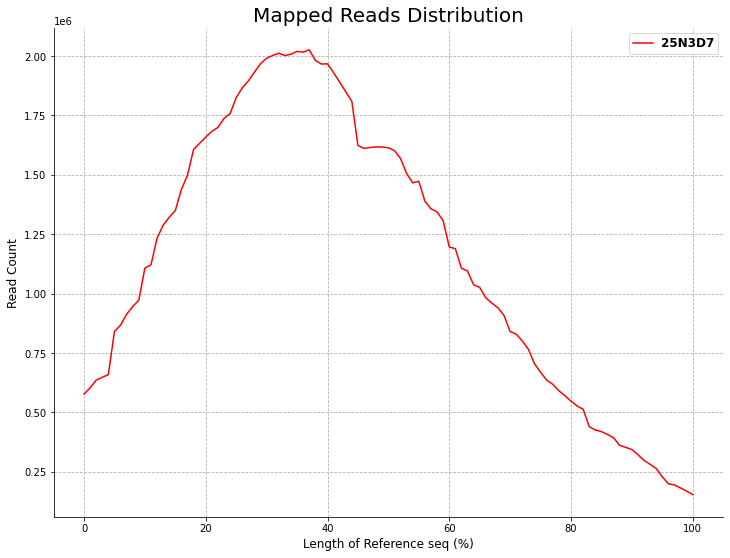

In [42]:
    x_list = [i for i in range(101)]
    plt.figure(figsize=(12, 9))
    plt.grid(linestyle="--")
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.plot(x_list, y_list, linewidth=1.5, color='red', label="25N3D7")

    plt.title("Mapped Reads Distribution", fontsize=20)
    plt.xlabel("Length of Reference seq (%)", fontsize=12)
    plt.ylabel("Read Count", fontsize=12)

    plt.tick_params(axis='both', labelsize=10)
    plt.legend(loc=1, numpoints=1)
    leg = plt.gca().get_legend()
    ltext = leg.get_texts()
    plt.setp(ltext, fontsize=12, fontweight='bold')
    plt.savefig("/SGRNJ06/randd/USER/cjj/celedev/jicuiyaokang/20230418reads_coverage/25N3D7mapped_reads_distribution.png", bbox_inches='tight', dpi=300)